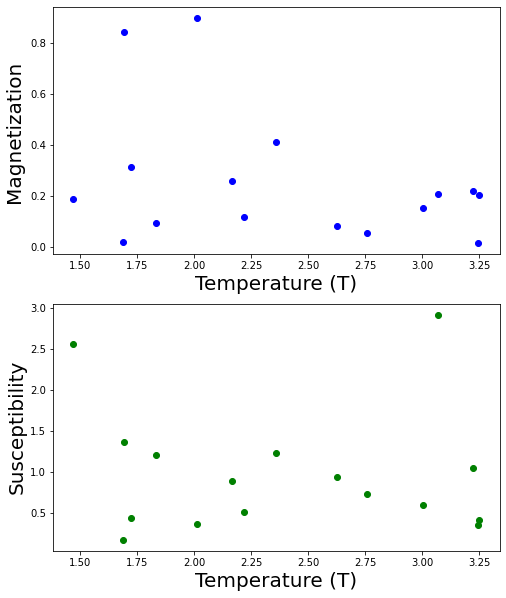

In [186]:

from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt


def initialstate(N):   
    ###generate a random spin initial state, with -1 for down and 1 for up
    state = 2*np.random.randint(0,2, size=(N,N))-1
    return state


def mcmove(config, beta):
    
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)#chose a random lattice to start the interaction
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb+0.1
                if cost < 0:
                    s=-s
                elif rand() < np.exp(-cost*beta):
                    s=-s
                config[a, b] = s
    return config


#def calcEnergy(config):
 #   '''Energy of a given configuration'''
  #  energy = 0
   # for i in range(len(config)):
#        for j in range(len(config)):
#            S = config[i,j]
#            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
#            energy += -nb*S
#    return energy/4.


def calcMag(config):
    #summing up the Magnetization 
    mag = np.sum(config)
    return mag

nt      = 2**4        # 温度点数量
N       = 2**4        # 点阵尺寸, N x N
eqSteps = 2**4       # MC方法平衡步数
mcSteps = 2**4       # MC方法计算步数

n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
tm = 2.269;    T=np.random.normal(tm, .64, nt)
T  = T[(T>1.2) & (T<3.8)];    nt = np.size(T)

Energy       = np.zeros(nt)
Magnetization  = np.zeros(nt)
Susceptibility = np.zeros(nt)


for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[m]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        
        Mag = calcMag(config)        # calculate the magnetisation

        
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

        
        Magnetization[m]  = n1*M1
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT

f = plt.figure(figsize=(8, 10)); # plot the calculated values    
sp =  f.add_subplot(2, 1, 1 );
plt.plot(T, np.abs(Magnetization), 'o', color='Blue');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);
sp =  f.add_subplot(2, 1, 2 );
plt.plot(T, Susceptibility, 'o', color="Green");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);

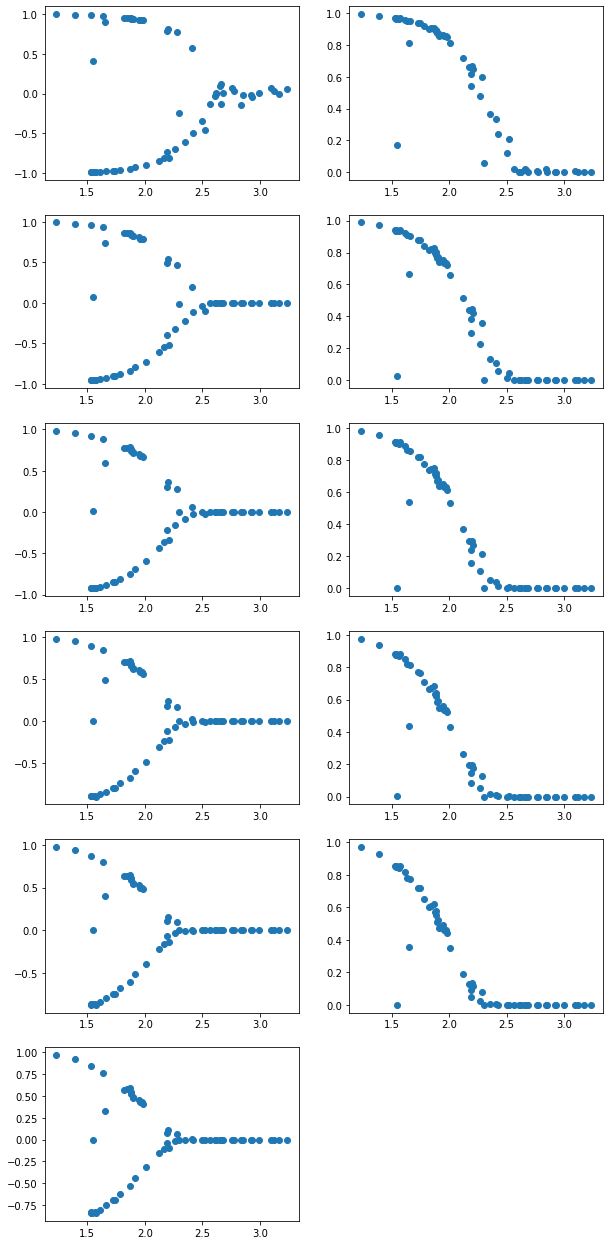

In [182]:
####approach 1 
f = plt.figure(figsize=(10, 30)); #a list of Log(M^(1/beta)) verse Log(T)

for beta_trial in np.arange(1,12):
    sp =  f.add_subplot(8, 2 ,beta_trial);
    
    M2=Magnetization**beta_trial
    plt.plot(T,M2,'o')

<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)
<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)
<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)
<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)
<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)
<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)
<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)
<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)
<ipython-input-161-256f1e8d91dc>:7: RuntimeWarning: invalid value encountered in log
  log_tc_t=np.log(tc-T)


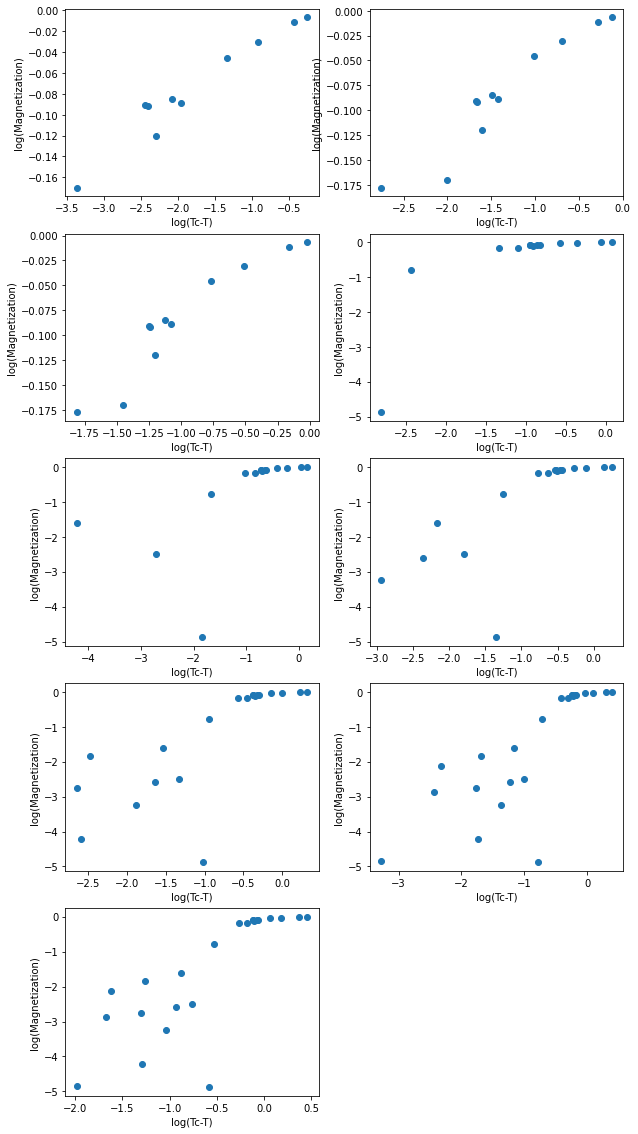

In [161]:
#### approach 2
log_Magnetization=np.log(np.abs(Magnetization))
f = plt.figure(figsize=(10, 20)); 
for i in np.arange(1,10):
    sp =  f.add_subplot(5, 2 ,i);
    tc=2+0.1*i
    log_tc_t=np.log(tc-T)
    
    plt.plot(log_tc_t,log_Magnetization,'o')
    plt.xlabel('log(Tc-T)')
    plt.ylabel('log(Magnetization)')

    


In [184]:
log_tc_t=np.log(np.abs(2.3-T))
log_Magnetization=np.log(np.abs(Magnetization))
M2=Magnetization**beta_trial
z1 = np.polyfit(M2,T, 1)

# 生成多项式对象
p1 = np.poly1d(z1)
print(z1)
print(p1)

[0.02992253 2.18903594]
 
0.02992 x + 2.189


In [168]:
M2=np.abs(Magnetization)**beta_trial
M2

array([0.10704836, 0.39975655, 0.91499685, 0.67299824, 0.99420777,
       0.12121969, 0.08830199, 0.23657819, 0.2730466 , 0.9774215 ,
       0.12014497, 0.98473146, 0.95518796, 0.09623973, 0.12566959,
       0.08708397, 0.25073135, 0.19891214, 0.44933762, 0.26386712,
       0.95841736, 0.28515625, 0.34752455, 0.12191005, 0.95544352,
       0.95671232, 0.99675989, 0.91860018, 0.94167365])